# Jonathan Halverson
# Tuesday, March 8, 2016
# Logistic regression applied to gender-height-weight data

In [130]:
# data obtained from here:
# https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/05-Regression/data/01_heights_weights_genders.csv

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [117]:
df = pd.read_csv('01_heights_weights_genders.csv')
df[4998:5002]

,Gender,Height,Weight
4998,Male,71.557718,185.905909
4999,Male,70.351880,198.903012
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823


In [118]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 312.5+ KB


In [120]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [121]:
df.columns

Index([u'Gender', u'Height', u'Weight'], dtype='object')

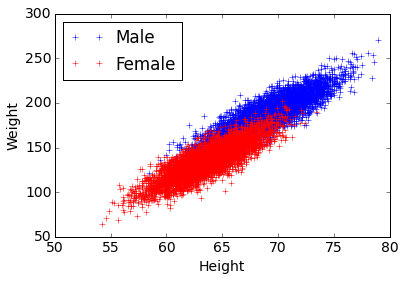

In [122]:
plt.plot(df.Height[df.Gender == "Male"], df.Weight[df.Gender == "Male"], 'b+', label="Male")
plt.plot(df.Height[df.Gender == "Female"], df.Weight[df.Gender == "Female"], 'r+', label="Female")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')

### Before doing the regression, we apply an indicator variable to Gender:

In [123]:
df.replace("Male", 0, inplace=True)
df.replace("Female", 1, inplace=True)
df[4998:5002]

,Gender,Height,Weight
4998,0,71.557718,185.905909
4999,0,70.351880,198.903012
5000,1,58.910732,102.088326
5001,1,65.230013,141.305823


In [124]:
import statsmodels.formula.api as smf
result = smf.logit(formula='Gender ~ Height + Weight', data=df).fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.209130
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Gender   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Mar 2016   Pseudo R-squ.:                  0.6983
Time:                        22:53:48   Log-Likelihood:                -2091.3
converged:                       True   LL-Null:                       -6931.5
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.6925      1.328     -0.521      0.602        -3.296     1.911
Height         0.4926      0.

In [125]:
result.pred_table()

array([[ 4603.,   397.],
       [  409.,  4591.]])

In [126]:
tp, fp, fn, tn = map(float, result.pred_table().flatten())
accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
print accuracy
print precision
print recall

0.9194
0.9206
0.91839584996


### These numbers suggest that the model is very good.

In [127]:
def roc_curve(r):
    thresholds = np.linspace(0.0, 1.0, num=100)
    fpr = []
    tpr = []
    for threshold in thresholds:
        tp, fp, fn, tn = map(float, r.pred_table(threshold).flatten())
        if (fp + tn > 0 and tp + fn > 0):
          fpr.append(fp / (fp + tn))
          tpr.append(tp / (tp + fn))
    return fpr, tpr

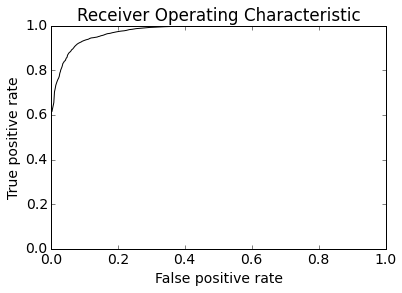

In [128]:
fpr, tpr = roc_curve(result)
plt.plot(fpr, tpr, 'k-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### The dividing line for threshold=1/2 is given by $\beta_i x_i = 0$ or $[\beta_0, \beta_1, \beta_2] \cdot [1, \textrm{Height}, \textrm{Weight}]$.

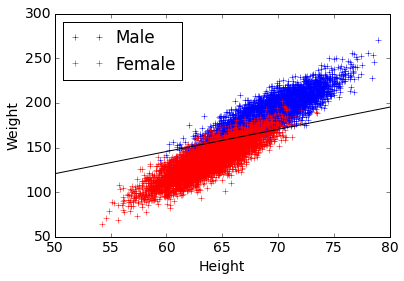

In [129]:
beta0, beta1, beta2 = result.params
x = np.linspace(50, 80)
y = -(beta0 + beta1 * x) / beta2
plt.plot(df.Height[df.Gender == 0], df.Weight[df.Gender == 0], 'b+', label="Male")
plt.plot(df.Height[df.Gender == 1], df.Weight[df.Gender == 1], 'r+', label="Female")
plt.plot(x, y, 'k-')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend(loc='upper left')

### Above the line we assign to Male, below Female.